# **Adaboost Regressor**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, root_mean_squared_error, balanced_accuracy_score
from mlxtend.plotting import plot_decision_regions

In [4]:
try:
    df = pd.read_csv(r"/workspaces/ML-Journey/Datasets/Dataset for weight prediction with gender.csv")
except:
    df = pd.read_csv(r"C:\\Users\\Archit\\Documents\\GitHub\\ML-Journey\\Datasets\\Dataset for weight prediction with gender.csv")

X = df.drop(columns=['weight_kg'])
y = df[['weight_kg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

norm = Normalizer()
X_train_trf = norm.fit_transform(X_train)
X_test_trf = norm.transform(X_test)

### Data visualization

<Axes: xlabel='weight_kg', ylabel='height_cm'>

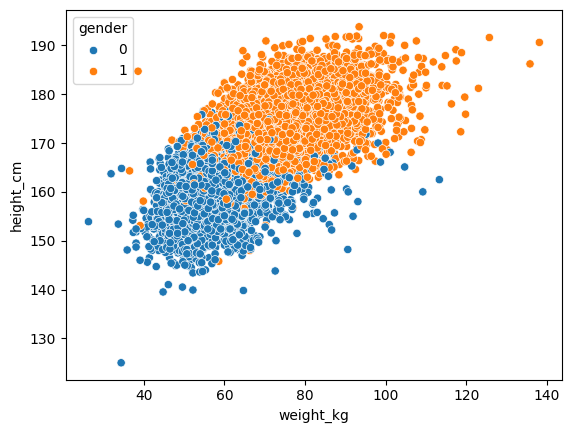

In [18]:
sns.scatterplot(df, x='weight_kg', y='height_cm', hue='gender')

In [20]:
df.corr()['weight_kg']

height_cm                0.734909
gender                   0.672887
weight_kg                1.000000
bmi_class_Normal        -0.526600
bmi_class_Obesity        0.346589
bmi_class_Overweight     0.529231
bmi_class_Underweight   -0.274765
Name: weight_kg, dtype: float64

### Applying Adaboosting

In [14]:
ada = AdaBoostRegressor()
ada.fit(X_train_trf, y_train)
y_pred = ada.predict(X_test_trf)
r2_score(y_test, y_pred)

c:\Users\Archit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8244027399533401

### Hyperparameter tunning: manual

In [23]:
ada2 = AdaBoostRegressor(estimator=ada, learning_rate=0.00 1)
ada2.fit(X_train_trf, y_train)
y_pred = ada2.predict(X_test_trf)
r2_score(y_test, y_pred)

c:\Users\Archit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8454996777814873